# Comparison different profiles DM - $b\bar{b}$

### CTA - LMG

In [1]:
# paper: Sensitivity of the Cherenkov Telescope Array to TeV photon emission from the Large Magellanic Cloud
# doi: 10.1093/mnras/stad1576
# instrument: CTA
# target: LMC

In [2]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:
NFWmax_bb = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_bb_sens_NFWmax.ecsv")
NFWmean_bb = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_bb_sens_NFWmean.ecsv")
isomean_bb = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_bb_sens_ISOmean.ecsv")
isomax_bb = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_bb_sens_ISOmax.ecsv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


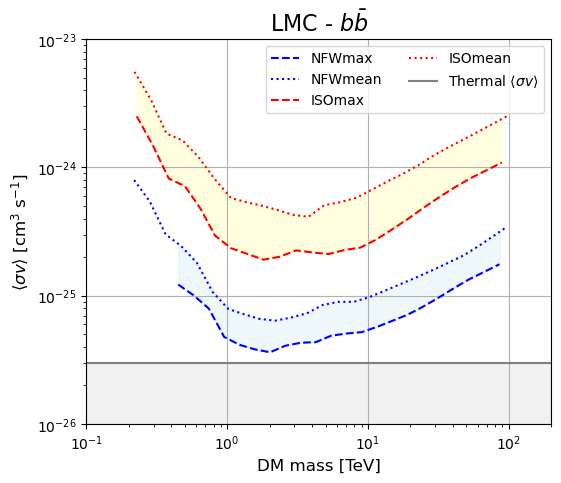

In [4]:
plt.figure(figsize=(6,5))
plt.xlabel("DM mass [TeV]", fontsize=12)
plt.ylabel(r"$\langle\sigma v \rangle$ [cm$^{3}$ s$^{-1}$]", fontsize=12)
plt.xlim(1e-1,2e2)
plt.ylim(1e-26,1e-23)
plt.title(r'LMC - $b\bar{b}$', fontsize=16)
plt.loglog(NFWmax_bb['mass']*1e-3,NFWmax_bb['sigmav'],color='b',linestyle='dashed',label="NFWmax")
plt.loglog(NFWmean_bb['mass']*1e-3,NFWmean_bb['sigmav'],color='b',linestyle='dotted',label="NFWmean")
plt.loglog(isomax_bb['mass']*1e-3,isomax_bb['sigmav'],color='r',linestyle='dashed',label="ISOmax")
plt.loglog(isomean_bb['mass']*1e-3,isomean_bb['sigmav'],color='r',linestyle='dotted',label="ISOmean")


f = interp1d(isomean_bb['mass']*1e-3, isomean_bb['sigmav'])
y_iso_interp = f(isomax_bb['mass']*1e-3)
plt.fill_between(isomax_bb['mass']*1e-3,isomax_bb['sigmav'], y_iso_interp, color='lightyellow', alpha=1)


g = interp1d(NFWmean_bb['mass']*1e-3, NFWmean_bb['sigmav'])
y_NFW_interp = g(NFWmax_bb['mass']*1e-3)
plt.fill_between(NFWmax_bb['mass']*1e-3,NFWmax_bb['sigmav'], y_NFW_interp, color='lightblue', alpha=0.2)


# Thermal <sigma v>
x = np.linspace(1e-2, 2e2, 1000)
y_0 = 3e-26

plt.axhline(y=y_0, color='gray', linestyle='solid', label=r"Thermal $\langle \sigma v \rangle$")
plt.fill_between(x, y_0, color='lightgray', alpha=0.3)


plt.legend(loc="best",ncol=2)
plt.grid()

plt.savefig("./plot_thesis/profiles_cta_bb_LMC.eps")
# plt.savefig("./plot_thesis/profiles_cta_bb_LMC.pdf")
# plt.savefig("./plot_thesis/profiles_cta_bb_LMC.png")

### CTA - GC

In [5]:
# paper: Sensitivity of the Cherenkov Telescope Array to a dark matter signal from the Galactic centre
# doi: 10.1088/1475-7516/2021/01/057
# instrument: CTA
# target: GC
 

In [6]:
core_bb_cta = ascii.read("../../dmbounds/bounds/cta/cta_2021_gc_ann_WW_sens_core.ecsv")
cusp_bb_cta = ascii.read("../../dmbounds/bounds/cta/cta_2021_gc_ann_WW_sens_cusp.ecsv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


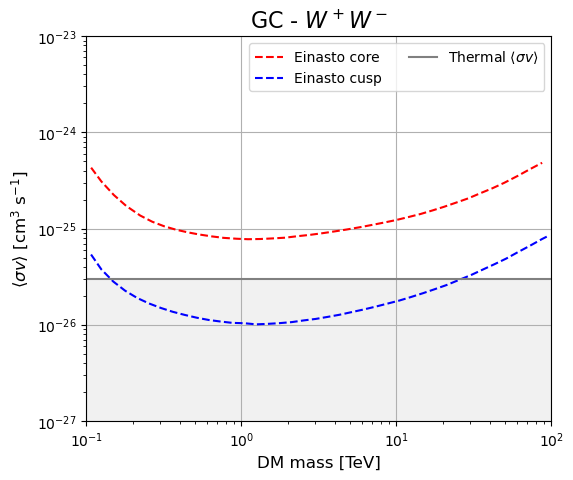

In [7]:
plt.figure(figsize=(6,5))
plt.xlabel("DM mass [TeV]", fontsize=12)
plt.ylabel(r"$\langle\sigma v \rangle$ [cm$^{3}$ s$^{-1}$]", fontsize=12)
plt.xlim(1e-1,1e2)
plt.ylim(1e-27,1e-23)
plt.title(r'GC - $W^+ W^-$', fontsize=16)

plt.loglog(core_bb_cta['mass']*1e-3,core_bb_cta['sigmav'],color='r',linestyle='dashed',label=r"Einasto core")
plt.loglog(cusp_bb_cta['mass']*1e-3,cusp_bb_cta['sigmav'],color='b',linestyle='dashed',label=r"Einasto cusp")


# Thermal <sigma v>
x = np.linspace(1e-2, 2e2, 1000)
y_0 = 3e-26

plt.axhline(y=y_0, color='gray', linestyle='solid', label=r"Thermal $\langle \sigma v \rangle$")
plt.fill_between(x, y_0, color='lightgray', alpha=0.3)

plt.legend(loc="best",ncol=2)
plt.grid()

plt.savefig("./plot_thesis/profiles_cta_WW_GC.eps")
# plt.savefig("./plot_thesis/profiles_cta_WW_GC.pdf")
# plt.savefig("./plot_thesis/profiles_cta_WW_GC.png")